# Project 4: Global wildlife trade

Maaike de Jong
Ironhack Data Analytics Part-time
02 May 2020

## 1. Introduction

In this project I investigate the international wildlife trade, with a focus on the trade in mammals. The wildlife trade - such as trade in ivory, or pets - is the number one cause of animal extinction, together with habitat destruction caused by land development. A recent study estimates that at least 1/5th of all vertebrate species is being traded (see this [article](https://www.bbc.com/news/science-environment-49904668)). 

Wildlife trade has many negative effects, with the most important ones being:
* Decline and extinction of populations
* Introduction of invasive species
* Spread of new diseases to humans 

With this project I focus on the trade in endangered mammals as listed by CITES, the Convention on International Trade in Endangered Species of Wild Fauna and Flora. In particular, I analyse trade in live mammals taken from the wild. 

### Project Questions
The main research questions I will try to answer in this project are:
* Which wild mammal groups and species are traded the most (in terms of live animals taken from the wild)?
* What are the main purposes for trade of these animals?
* How has the trade changed over the past two decades (2000-2018)? 

<a name="requirements"></a>

### Data  
I'm using the [CITES trade database](https://trade.cites.org/) as source for my data. This database contains more than 20 million records of trade and is openly accessible. On the website of the database a selection of data can be made for download. Documentation from CITES on how to use the data can be found [here](https://trade.cites.org/cites_trade_guidelines/en-CITES_Trade_Database_Guide.pdf). 
I selected my data with the following parameters: 
* Year range: 2000-2019
* Source: W - Wild
* Exporting countries: All countries
* Importing countries: All countries
* Purpose: All purposes
* Trade Terms: Liv - Live
* Taxon: Mammalia

The resulting dataset used in this jupyter notebook can be found [here](https://drive.google.com/drive/folders/1wujpJSR6rC7AMeIm_jfcjtQV3lwDohu9). 

### Links
[Github repository](https://github.com/paoloironhack/dataptams2020/tree/maaike/projects/Project4_Module2_Final_Project)  
[Presentation slides](https://drive.google.com/drive/folders/1wujpJSR6rC7AMeIm_jfcjtQV3lwDohu9)  
[Trello board](https://trello.com/b/qdD9iGnD/project-4)  

## 2. Importing packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 3. Inspecting and cleaning the data

In [2]:
# importing the data

df = pd.read_csv('../data/mammals_wild_live_00_19.csv')
df.head()

,Year,App.,Taxon,Class,Order,Family,Genus,Importer,Exporter,Origin,Importer reported quantity,Exporter reported quantity,Term,Unit,Purpose,Source
0,2000,I,Bos gaurus,Mammalia,Artiodactyla,Bovidae,Bos,EE,US,NaN,4.0,NaN,live,NaN,Z,NaN
1,2000,I,Pudu puda,Mammalia,Artiodactyla,Cervidae,Pudu,ZA,DE,NaN,2.0,NaN,live,NaN,Z,NaN
2,2000,I,Elephas maximus,Mammalia,Proboscidea,Elephantidae,Elephas,CA,US,XX,6.0,NaN,live,NaN,Q,W
3,2000,I,Elephas maximus,Mammalia,Proboscidea,Elephantidae,Elephas,CN,MY,NaN,20.0,10.0,live,NaN,Z,W
4,2000,I,Elephas maximus,Mammalia,Proboscidea,Elephantidae,Elephas,CR,MX,NaN,2.0,NaN,live,NaN,Q,U


In [3]:
# Inspect dataframe attributes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6346 entries, 0 to 6345
Data columns (total 16 columns):
Year                          6346 non-null int64
App.                          6346 non-null object
Taxon                         6346 non-null object
Class                         6346 non-null object
Order                         6346 non-null object
Family                        6343 non-null object
Genus                         6325 non-null object
Importer                      6239 non-null object
Exporter                      6274 non-null object
Origin                        1359 non-null object
Importer reported quantity    3193 non-null float64
Exporter reported quantity    4188 non-null float64
Term                          6346 non-null object
Unit                          5 non-null object
Purpose                       5956 non-null object
Source                        5900 non-null object
dtypes: float64(2), int64(1), object(13)
memory usage: 793.3+ KB


In [4]:
# Inspect missing data

df.isnull().sum()

Year                             0
App.                             0
Taxon                            0
Class                            0
Order                            0
Family                           3
Genus                           21
Importer                       107
Exporter                        72
Origin                        4987
Importer reported quantity    3153
Exporter reported quantity    2158
Term                             0
Unit                          6341
Purpose                        390
Source                         446
dtype: int64

In [5]:
# inspect column 'Year'

df['Year'].value_counts()

2000    508
2001    501
2002    392
2010    391
2003    388
2004    374
2005    352
2012    331
2009    328
2011    321
2013    310
2006    308
2008    307
2007    279
2016    265
2018    260
2014    259
2017    257
2015    210
2019      5
Name: Year, dtype: int64

In [6]:
# exclude 2019 because there are few records, data for this year is not complete

df1 = df[df['Year'] != 2019]

In [7]:
# inspect column 'App.', this is info on which Appendix the species are listed

df1['App.'].value_counts()

II     4637
I       981
III     715
N         8
Name: App., dtype: int64

In [8]:
# inspect column 'Order'

df1['Order'].value_counts()

Primates          2424
Carnivora         1971
Cetacea            530
Proboscidea        380
Artiodactyla       354
Perissodactyla     342
Rodentia            94
Chiroptera          70
Pilosa              62
Pholidota           59
Sirenia             28
Scandentia          14
Diprotodontia       11
Cingulata            2
Name: Order, dtype: int64

In [9]:
# inspect column 'Term', this should be all live

df1['Term'].value_counts()

live    6341
Name: Term, dtype: int64

In [10]:
# inspect column 'Purpose'

df1['Purpose'].value_counts()

# These letters are codes for the purpose of the traded animals

T    2265
Z    1337
Q     776
P     407
B     383
S     265
N     217
M     113
E     104
H      63
L      21
Name: Purpose, dtype: int64

In [11]:
# inspect column 'Purpose'

df1['Source'].value_counts()

# 'W' means wild, 'U' means source unknown. So I'm removing the records with an unknown source

W    5458
U     437
Name: Source, dtype: int64

In [12]:
df2 = df1[df1['Source'] == 'W']

In [13]:
# add a column with English names of the Order

df2.loc[df['Order'] == 'Primates','Animal order'] = 'Primates'
df2.loc[df['Order'] == 'Carnivora','Animal order'] = 'Carnivores'
df2.loc[df['Order'] == 'Cetacea','Animal order'] = 'Whales and Dolphins'
df2.loc[df['Order'] == 'Proboscidea','Animal order'] = 'Elephants'
df2.loc[df['Order'] == 'Artiodactyla','Animal order'] = 'Even-toed Ungulates'
df2.loc[df['Order'] == 'Perissodactyla','Animal order'] = 'Odd-toed Ungulates'
df2.loc[df['Order'] == 'Chiroptera','Animal order'] = 'Bats'
df2.loc[df['Order'] == 'Pilosa','Animal order'] = 'Sloths and Anteaters'
df2.loc[df['Order'] == 'Pholidota','Animal order'] = 'Pangolins'
df2.loc[df['Order'] == 'Sirenia','Animal order'] = 'Sea-cows'
df2.loc[df['Order'] == 'Scandentia','Animal order'] = 'Treeshrews'
df2.loc[df['Order'] == 'Diprotodontia','Animal order'] = 'Marsupials'
df2.loc[df['Order'] == 'Cingulata','Animal order'] = 'Armadillos'

df2['Animal order'].value_counts()

//anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
//anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Primates                2109
Carnivores              1594
Whales and Dolphins      523
Odd-toed Ungulates       324
Even-toed Ungulates      304
Elephants                290
Bats                      69
Sloths and Anteaters      59
Pangolins                 56
Sea-cows                  28
Treeshrews                13
Marsupials                 8
Armadillos                 2
Name: Animal order, dtype: int64

In [14]:
# Create new column with Purpose descriptions based on 1 letter codes in 'Purpose' column (see CITES documentation)
# first rename original purpose column

df2.rename(columns={'Purpose': 'Purpose_code'}, inplace = True)
df2.head()

//anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,Year,App.,Taxon,Class,Order,Family,Genus,Importer,Exporter,Origin,Importer reported quantity,Exporter reported quantity,Term,Unit,Purpose_code,Source,Animal order
2,2000,I,Elephas maximus,Mammalia,Proboscidea,Elephantidae,Elephas,CA,US,XX,6.0,NaN,live,NaN,Q,W,Elephants
3,2000,I,Elephas maximus,Mammalia,Proboscidea,Elephantidae,Elephas,CN,MY,NaN,20.0,10.0,live,NaN,Z,W,Elephants
6,2000,I,Elephas maximus,Mammalia,Proboscidea,Elephantidae,Elephas,CZ,ES,XX,1.0,NaN,live,NaN,Q,W,Elephants
8,2000,I,Elephas maximus,Mammalia,Proboscidea,Elephantidae,Elephas,ES,CZ,XX,NaN,1.0,live,NaN,Q,W,Elephants
9,2000,I,Elephas maximus,Mammalia,Proboscidea,Elephantidae,Elephas,ES,US,IN,NaN,3.0,live,NaN,NaN,W,Elephants


In [15]:
# then, create new column 'Purpose'
df2['Purpose'] = df2['Purpose_code']
df2 = df2.replace({'Purpose': {'B': 'Captive breeding', 'E': 'Educational', 'G': 'Botanical Garden', 'H': 'Hunting trophy', 'L': 'Forensic', 'M': 'Medical', 'N': 'Reintroduction', 'P': 'Personal', 'Q': 'Circus', 'S': 'Scientific', 'T': 'Commercial', 'Z': 'Zoo'}})


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [16]:
df2['Purpose'].value_counts()

Commercial          2209
Zoo                 1191
Circus               492
Captive breeding     363
Personal             358
Scientific           248
Reintroduction       213
Medical              110
Educational           88
Hunting trophy        61
Forensic              10
Name: Purpose, dtype: int64

In [17]:
df2.head()

,Year,App.,Taxon,Class,Order,Family,Genus,Importer,Exporter,Origin,Importer reported quantity,Exporter reported quantity,Term,Unit,Purpose_code,Source,Animal order,Purpose
2,2000,I,Elephas maximus,Mammalia,Proboscidea,Elephantidae,Elephas,CA,US,XX,6.0,NaN,live,NaN,Q,W,Elephants,Circus
3,2000,I,Elephas maximus,Mammalia,Proboscidea,Elephantidae,Elephas,CN,MY,NaN,20.0,10.0,live,NaN,Z,W,Elephants,Zoo
6,2000,I,Elephas maximus,Mammalia,Proboscidea,Elephantidae,Elephas,CZ,ES,XX,1.0,NaN,live,NaN,Q,W,Elephants,Circus
8,2000,I,Elephas maximus,Mammalia,Proboscidea,Elephantidae,Elephas,ES,CZ,XX,NaN,1.0,live,NaN,Q,W,Elephants,Circus
9,2000,I,Elephas maximus,Mammalia,Proboscidea,Elephantidae,Elephas,ES,US,IN,NaN,3.0,live,NaN,NaN,W,Elephants,NaN


In [18]:
# create single column with quantities of traded animals

df2['Quantity'] = ''

In [19]:
df2.head()

,Year,App.,Taxon,Class,Order,Family,Genus,Importer,Exporter,Origin,Importer reported quantity,Exporter reported quantity,Term,Unit,Purpose_code,Source,Animal order,Purpose,Quantity
2,2000,I,Elephas maximus,Mammalia,Proboscidea,Elephantidae,Elephas,CA,US,XX,6.0,NaN,live,NaN,Q,W,Elephants,Circus,
3,2000,I,Elephas maximus,Mammalia,Proboscidea,Elephantidae,Elephas,CN,MY,NaN,20.0,10.0,live,NaN,Z,W,Elephants,Zoo,
6,2000,I,Elephas maximus,Mammalia,Proboscidea,Elephantidae,Elephas,CZ,ES,XX,1.0,NaN,live,NaN,Q,W,Elephants,Circus,
8,2000,I,Elephas maximus,Mammalia,Proboscidea,Elephantidae,Elephas,ES,CZ,XX,NaN,1.0,live,NaN,Q,W,Elephants,Circus,
9,2000,I,Elephas maximus,Mammalia,Proboscidea,Elephantidae,Elephas,ES,US,IN,NaN,3.0,live,NaN,NaN,W,Elephants,NaN,


In [20]:
# create single column with quantities of traded animals.
# in case both imported and exported numbers are reported, take imported numbers

df2.loc[df2['Importer reported quantity'] != 'NaN', 'Quantity'] = df2['Importer reported quantity']
df2['Quantity'].fillna(0, inplace=True)
df2.loc[df2['Quantity'] == 0, 'Quantity'] = df2['Exporter reported quantity']

df2.head(10)

//anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,Year,App.,Taxon,Class,Order,Family,Genus,Importer,Exporter,Origin,Importer reported quantity,Exporter reported quantity,Term,Unit,Purpose_code,Source,Animal order,Purpose,Quantity
2,2000,I,Elephas maximus,Mammalia,Proboscidea,Elephantidae,Elephas,CA,US,XX,6.0,NaN,live,NaN,Q,W,Elephants,Circus,6.0
3,2000,I,Elephas maximus,Mammalia,Proboscidea,Elephantidae,Elephas,CN,MY,NaN,20.0,10.0,live,NaN,Z,W,Elephants,Zoo,20.0
6,2000,I,Elephas maximus,Mammalia,Proboscidea,Elephantidae,Elephas,CZ,ES,XX,1.0,NaN,live,NaN,Q,W,Elephants,Circus,1.0
8,2000,I,Elephas maximus,Mammalia,Proboscidea,Elephantidae,Elephas,ES,CZ,XX,NaN,1.0,live,NaN,Q,W,Elephants,Circus,1.0
9,2000,I,Elephas maximus,Mammalia,Proboscidea,Elephantidae,Elephas,ES,US,IN,NaN,3.0,live,NaN,NaN,W,Elephants,NaN,3.0
10,2000,I,Elephas maximus,Mammalia,Proboscidea,Elephantidae,Elephas,GE,LA,NaN,2.0,NaN,live,NaN,Z,W,Elephants,Zoo,2.0
11,2000,I,Elephas maximus,Mammalia,Proboscidea,Elephantidae,Elephas,KR,MY,NaN,2.0,2.0,live,NaN,Z,W,Elephants,Zoo,2.0
12,2000,I,Elephas maximus,Mammalia,Proboscidea,Elephantidae,Elephas,MT,HU,XX,1.0,NaN,live,NaN,Q,W,Elephants,Circus,1.0
13,2000,I,Elephas maximus,Mammalia,Proboscidea,Elephantidae,Elephas,MY,CN,MY,1.0,NaN,live,NaN,Q,W,Elephants,Circus,1.0
14,2000,I,Elephas maximus,Mammalia,Proboscidea,Elephantidae,Elephas,NO,SE,IN,NaN,3.0,live,NaN,Q,W,Elephants,Circus,3.0


## 4. Data analysis and visualization

### 4.1. Mammals in general: trade over time and trading purposes

I start with an overview of all mammals grouped together. First plotting the total number of mammals traded over time.

In [22]:
# First, create df for total number of traded mammals per year
trades_year = df2.groupby('Year').agg({'Quantity': 'sum'}).reset_index()
trades_year.head()

,Year,Quantity
0,2000,16432.0
1,2001,15214.0
2,2002,8333.0
3,2003,16487.0
4,2004,15630.0


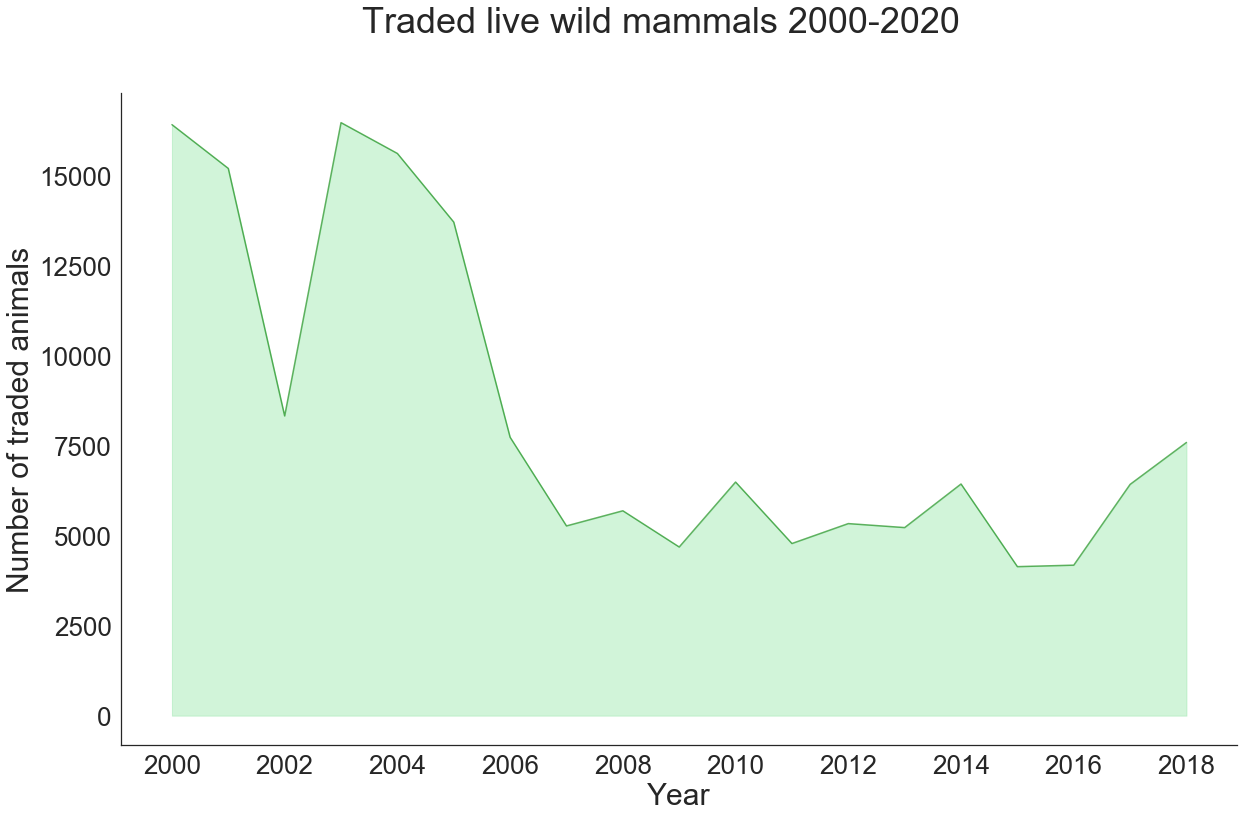

In [23]:
# Plot this in a line area chart

sns.set()
sns.set_style('white')

f, ax = plt.subplots(figsize=(20, 12))
sns.set_color_codes('pastel')

plt.fill_between(trades_year['Year'], trades_year['Quantity'], color="g", alpha=0.4)
plt.plot(trades_year['Year'], trades_year['Quantity'], color="green", alpha=0.6)

ax.set_xticks(range(2000, 2020, 2))

ax.tick_params(axis='both', which='major', labelsize=26) 
ax.tick_params(axis='both', which='minor', labelsize=26)

plt.xlabel('Year', fontsize=30)
plt.ylabel('Number of traded animals', fontsize=30)
plt.suptitle('Traded live wild mammals 2000-2020', fontsize=36)

sns.despine()

plt.show()

This figure shows that overall trade in wild live mammals is lower in the current decade compared to the previous one. Next, I'll look at the distribution of trading purpose for all the mammals.

In [24]:
# create dataframe with overall purpose counts and percentages

df_purpose = df2.groupby('Purpose', as_index = False).agg({'Quantity': 'sum'}).sort_values(by = 'Quantity', ascending = False).reset_index(drop = True)
df_purpose

,Purpose,Quantity
0,Commercial,85513.0
1,Scientific,21581.0
2,Medical,19223.0
3,Captive breeding,12159.0
4,Zoo,11350.0
5,Reintroduction,2961.0
6,Circus,1518.0
7,Personal,1433.0
8,Educational,410.0
9,Hunting trophy,318.0


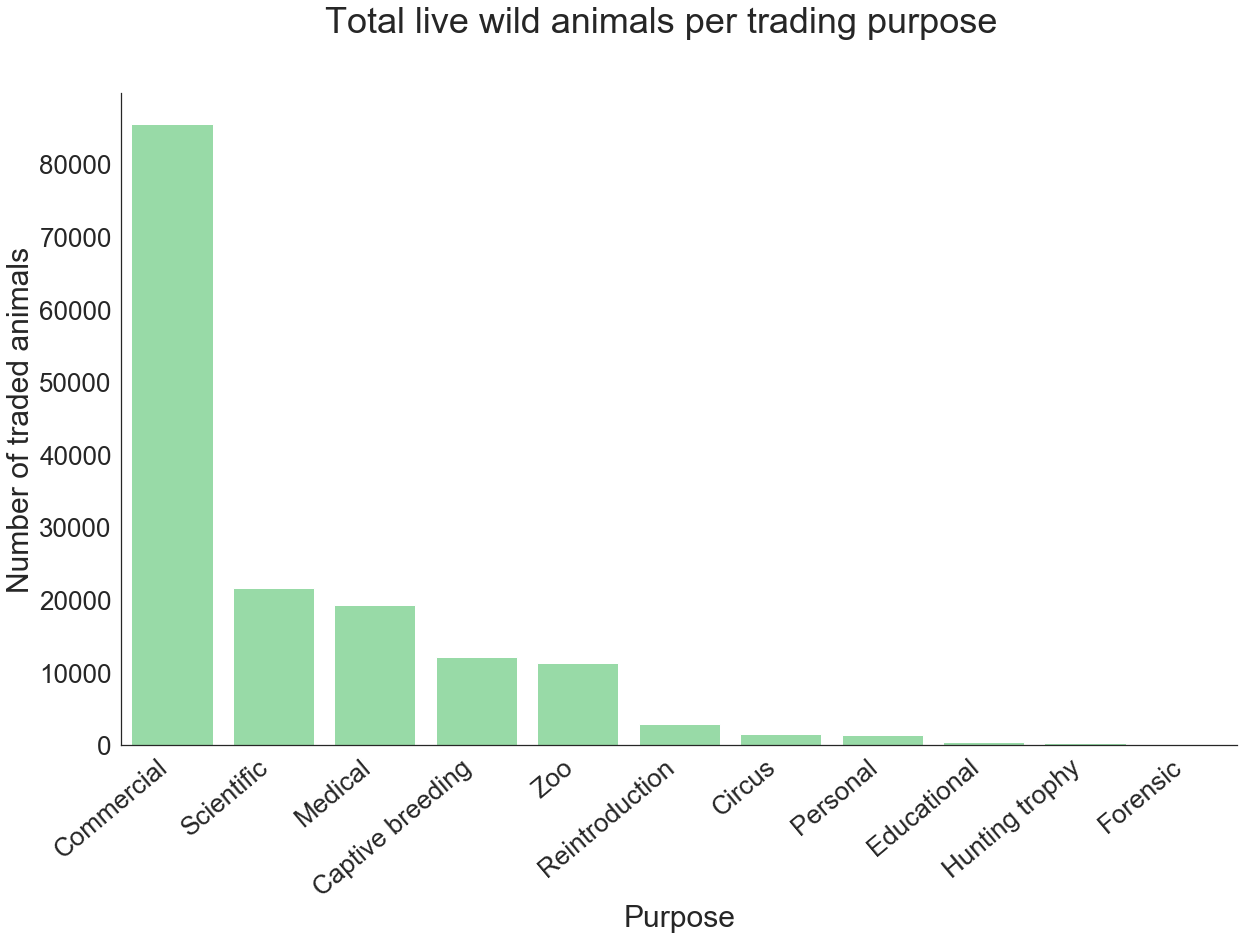

In [25]:
# visualise overall purpose with bar chart

sns.set()
sns.set_style('white')

f, ax = plt.subplots(figsize=(20, 12))

sns.set_color_codes('pastel')
sns.barplot(x='Purpose', y= 'Quantity', data= df_purpose,
            label= 'Purpose', color="g")

ax.set_xticklabels(df_purpose['Purpose'], rotation=40, ha='right')

ax.tick_params(axis='both', which='major', labelsize=26) 
ax.tick_params(axis='both', which='minor', labelsize=26)

plt.xlabel('Purpose', fontsize=30)
plt.ylabel('Number of traded animals', fontsize=30)
plt.suptitle('Total live wild animals per trading purpose', fontsize=36)

sns.despine()

This figure shows that Commercial trades are by far the most common for this group of animals. After commercial, scientific, medical, captive breeding, and zoo are also important purposes.

Next, let's look at the different main mammal groups (at the Order level) that are being traded.

In [26]:
# create dataframe with total number of traded animals per animal group (order)

order_trades2 = df2.groupby('Animal order', as_index = False).agg({'Quantity': 'sum'}).sort_values(by = 'Quantity', ascending = False).reset_index(drop = True)
order_trades2.head()

,Animal order,Quantity
0,Primates,124009.0
1,Carnivores,14826.0
2,Even-toed Ungulates,9028.0
3,Whales and Dolphins,2978.0
4,Odd-toed Ungulates,2255.0


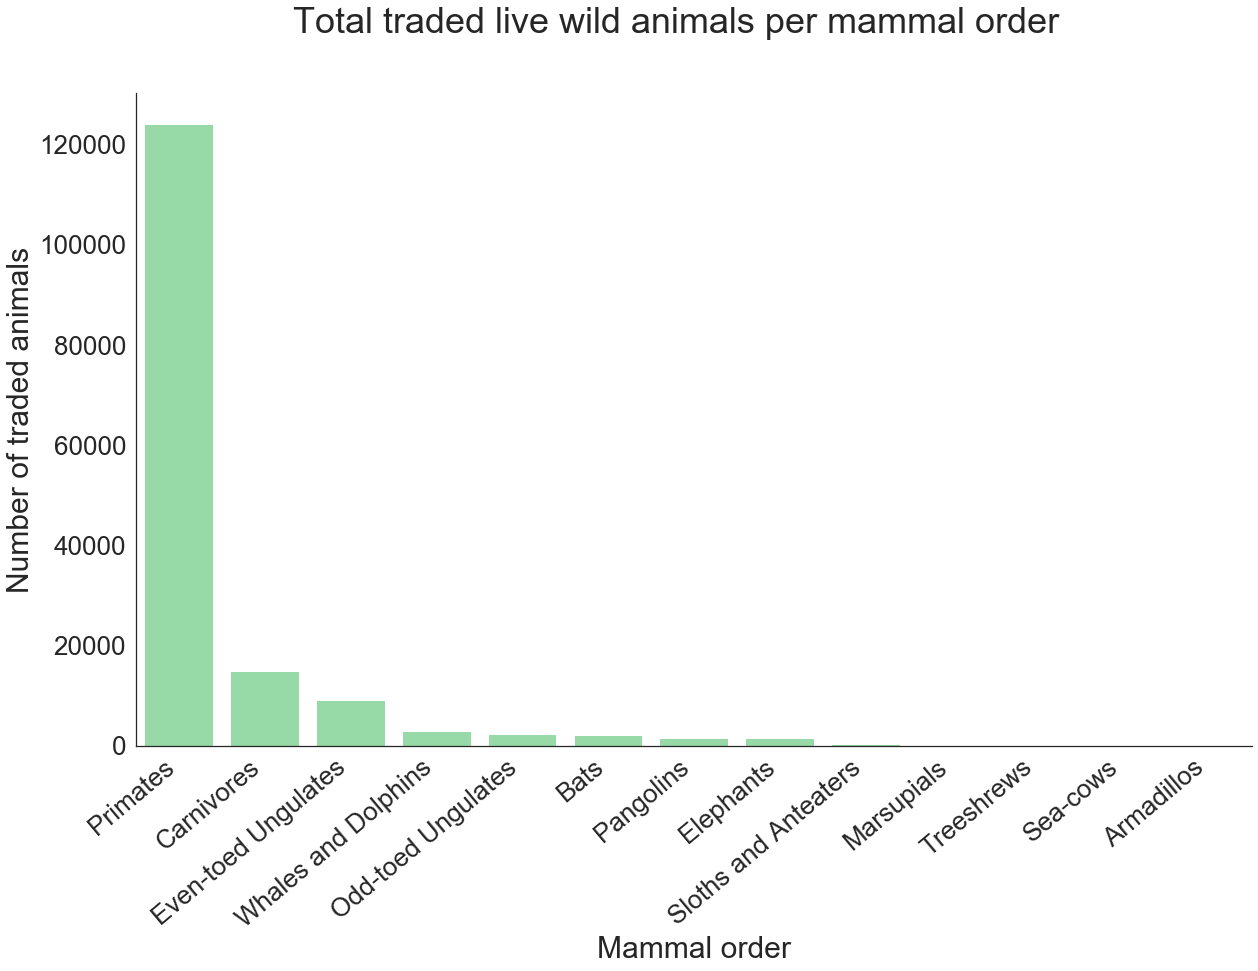

In [27]:
sns.set()
sns.set_style('white')

f, ax = plt.subplots(figsize=(20, 12))

sns.set_color_codes('pastel')
sns.barplot(x='Animal order', y= 'Quantity', data= order_trades2,
            label= 'Mammal group', color="g")

ax.set_xticklabels(order_trades2['Animal order'], rotation=40, ha='right')#, fontsize = 14)

ax.tick_params(axis='both', which='major', labelsize=26) 
ax.tick_params(axis='both', which='minor', labelsize=26)

plt.xlabel('Mammal order', fontsize=30)
plt.ylabel('Number of traded animals', fontsize=30)
plt.suptitle('Total traded live wild animals per mammal order', fontsize=36)

sns.despine()


By far, the most traded group are the Primates. To further investigate trade in the main mammal groups, I'll plot them over time. 

In [28]:
# create dataframe with total number of shipped animals per year per animal group (order)

year_order_trades = df2.groupby(['Year', 'Animal order'], as_index = False).agg({'Quantity': 'sum'})
year_order_trades.head()

,Year,Animal order,Quantity
0,2000,Bats,194.0
1,2000,Carnivores,400.0
2,2000,Elephants,121.0
3,2000,Even-toed Ungulates,298.0
4,2000,Odd-toed Ungulates,35.0


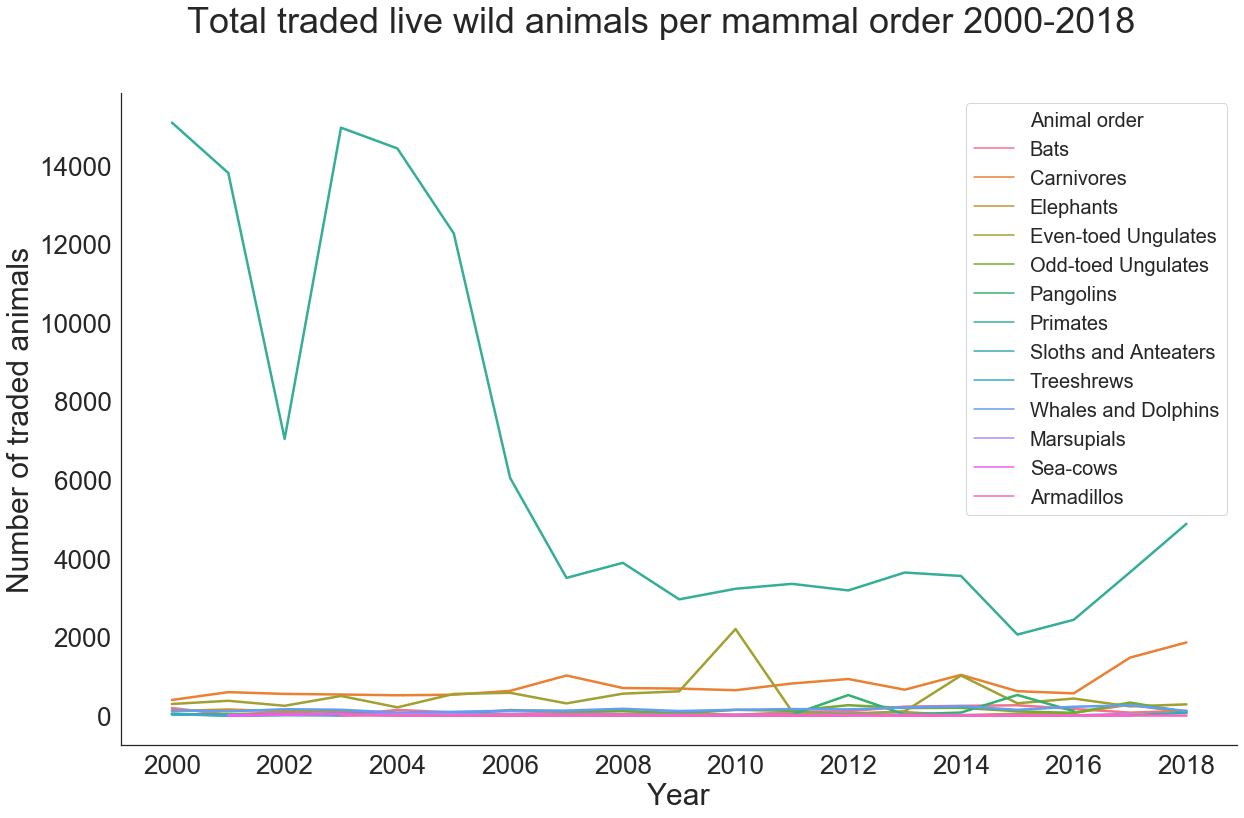

In [30]:
#plot total number of shipped animals per year per animal group (order)

f, ax = plt.subplots(figsize=(20, 12))

sns.lineplot(x = 'Year', y = 'Quantity', hue = 'Animal order', data = year_order_trades, linewidth=2.5)

ax.tick_params(axis='both', which='major', labelsize=26) 
ax.tick_params(axis='both', which='minor', labelsize=26)
ax.set_xticks(range(2000, 2020, 2))

ax.legend(loc="upper right", frameon=True, fontsize = 20)

plt.xlabel('Year', fontsize=30)
plt.ylabel('Number of traded animals', fontsize=30)
plt.suptitle('Total traded live wild animals per mammal order 2000-2018', fontsize=36)

sns.despine()


This shows again that the Primates are the most important traded mammal order and that their trade has declined considerably compared to the previous decade. In the next section I'll look into Primates in more detail. 

### 4.2. Primates

In [31]:
# create dataframe with numbers just for primates and years
df_primates = df2[df2['Animal order'] == 'Primates']
year_primates = df_primates.groupby('Year', as_index = False).agg({'Quantity': 'sum'})
year_primates.head()

,Year,Quantity
0,2000,15088.0
1,2001,13807.0
2,2002,7042.0
3,2003,14960.0
4,2004,14431.0


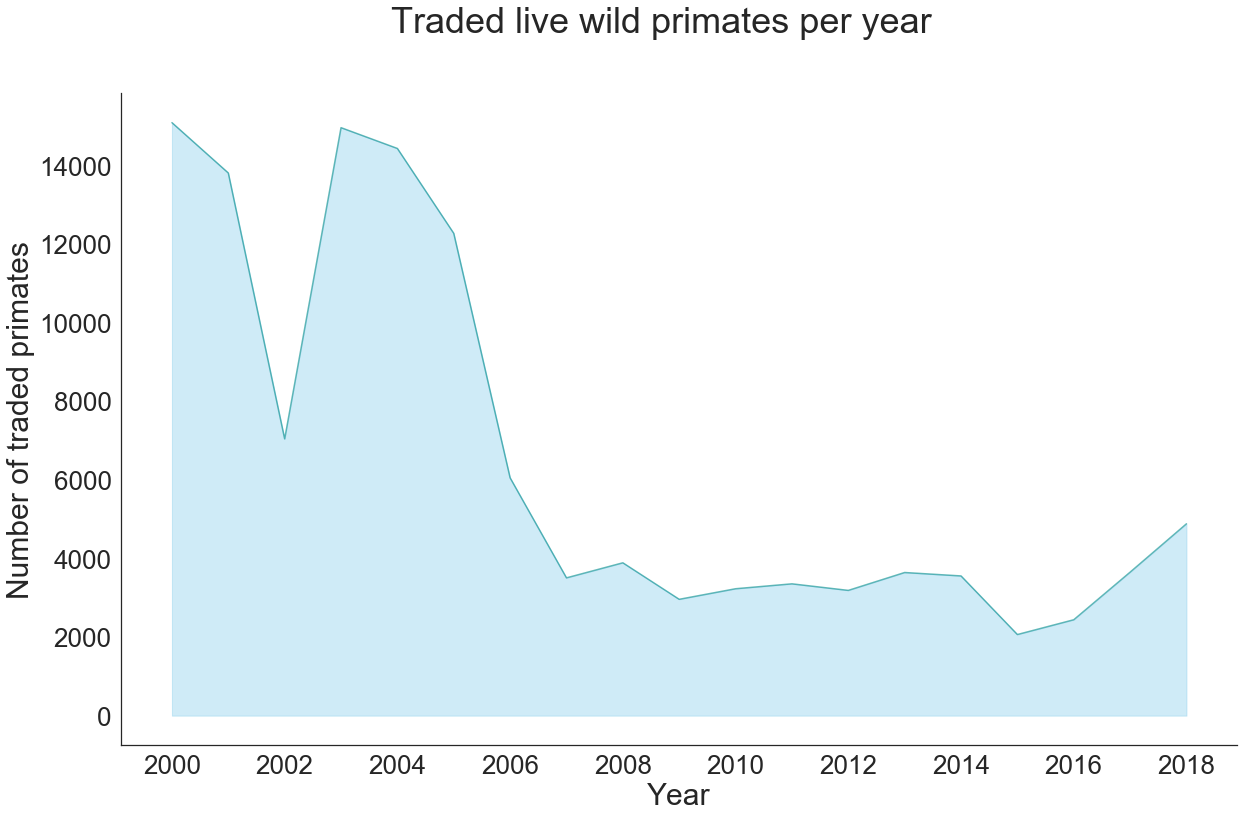

In [32]:
# Create area line chart for primates over time
f, ax = plt.subplots(figsize=(20, 12))
sns.set_color_codes('pastel')

plt.fill_between(year_primates['Year'], year_primates['Quantity'], color="skyblue", alpha=0.4)
plt.plot(year_primates['Year'], year_primates['Quantity'], color="darkcyan", alpha=0.6)

ax.set_xticks(range(2000, 2020, 2))

ax.tick_params(axis='both', which='major', labelsize=26) 
ax.tick_params(axis='both', which='minor', labelsize=26)

plt.xlabel('Year', fontsize=30)
plt.ylabel('Number of traded primates', fontsize=30)
plt.suptitle('Traded live wild primates per year', fontsize=36)

sns.despine()

plt.show()


The primate trade over time has more or less the same shape as the total mammal trade over time as the primates represent such a large proportion of the data.
Next, I look into the different Primate families in more detail. 

In [33]:
# look into the different kinds of primates and their trade over time
# make a dataframe and line chart with the different kinds

# First, inspect how many traded primate families there are
primate_family_counts = df_primates.groupby(['Family'], as_index = False).agg({'Quantity': 'sum'}).sort_values(by = 'Quantity', ascending = False)

# Add column with percentages of total
primate_family_counts['Percentage'] = (primate_family_counts['Quantity'] / primate_family_counts['Quantity'].sum()) *100
primate_family_counts.head()


,Family,Quantity,Percentage
3,Cercopithecidae,93611.0,75.487263
2,Cebidae,27627.0,22.278222
6,Galagidae,856.0,0.690272
0,Aotidae,501.0,0.404003
11,Lorisidae,324.0,0.261271


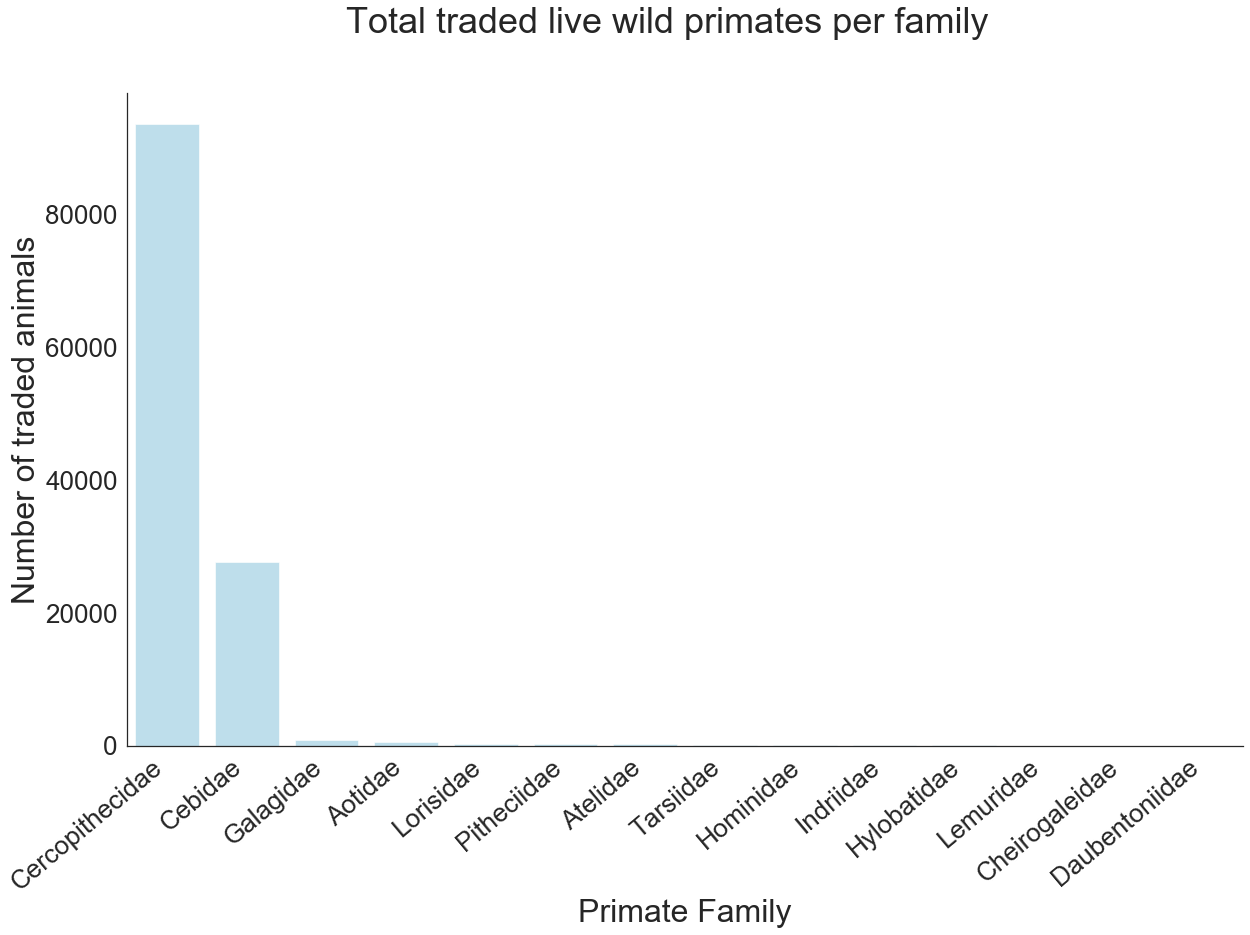

In [34]:
# visualise the overall numbers of traded primates per family in a bar chart

sns.set()
sns.set_style('white')

f, ax = plt.subplots(figsize=(20, 12))

sns.set_color_codes('pastel')
sns.barplot(x='Family', y= 'Quantity', data= primate_family_counts,
            label= 'Family', color="skyblue", alpha=0.6)

ax.set_xticklabels(primate_family_counts['Family'], rotation=40, ha='right')

ax.tick_params(axis='both', which='major', labelsize=26) 
ax.tick_params(axis='both', which='minor', labelsize=26)

plt.xlabel('Primate Family', fontsize=32)
plt.ylabel('Number of traded animals', fontsize=32)
plt.suptitle('Total traded live wild primates per family', fontsize=36)

sns.despine()

From this figure it becomes clear that the Old-World Monkeys (Cercopithecidae) and the New-World Monkeys (Cebidae) are the biggest group, they make up nearly 98% of the traded livec wild primates. What are the most traded species in these families?

In [35]:
# df for cercopithecidae
cerco = df2[df2['Family'] == 'Cercopithecidae']

cerco_taxon_counts = cerco.groupby(['Taxon'], as_index = False).agg({'Quantity': 'sum'}).sort_values(by = 'Quantity', ascending = False).reset_index(drop = True)

# Add column with percentages of total
cerco_taxon_counts['Percentage'] = (cerco_taxon_counts['Quantity'] / cerco_taxon_counts['Quantity'].sum()) *100
cerco_taxon_counts.head()

,Taxon,Quantity,Percentage
0,Macaca fascicularis,55376.0,59.155441
1,Chlorocebus aethiops,21597.0,23.071007
2,Chlorocebus sabaeus,4171.0,4.455673
3,Erythrocebus patas,2857.0,3.051992
4,Chlorocebus pygerythrus,1596.0,1.704928


The crab-eating maqaque (Macaca fascicularis) is the most traded primate in this family (60%). According to google many of these monkeys are traded for commercial research and end up in labs as testing animals. Second is the Grivet monkey (23%). 

Next, I'm looking at how the trading purpose changes over time for the primates.

In [36]:
# create dataframe with total number of shipped animals per year per purpose

primates_year_purpose = df_primates.groupby(['Year', 'Purpose'], as_index = False).agg({'Quantity': 'sum'})
primates_year_purpose.head()

,Year,Purpose,Quantity
0,2000,Captive breeding,8.0
1,2000,Circus,8.0
2,2000,Commercial,6033.0
3,2000,Educational,30.0
4,2000,Hunting trophy,6.0


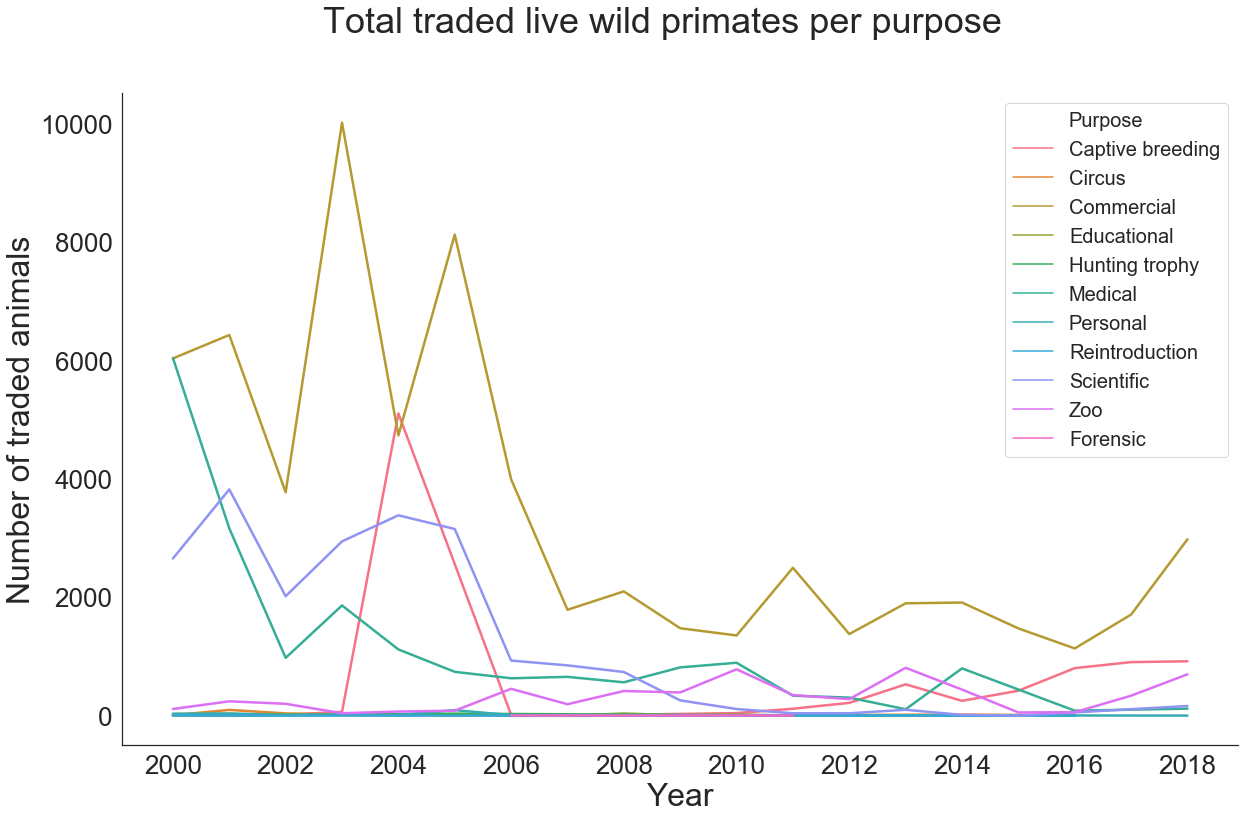

In [37]:
#plot total number of shipped primates per year per purpose

f, ax = plt.subplots(figsize=(20, 12))

sns.lineplot(x = 'Year', y = 'Quantity', hue = 'Purpose', data = primates_year_purpose, linewidth=2.5)

ax.tick_params(axis='both', which='major', labelsize=26) 
ax.tick_params(axis='both', which='minor', labelsize=26)
ax.set_xticks(range(2000, 2020, 2))

ax.legend(loc="upper right", frameon=True, fontsize = 20)

plt.xlabel('Year', fontsize=32)
plt.ylabel('Number of traded animals', fontsize=32)
plt.suptitle('Total traded live wild primates per purpose', fontsize=36)

sns.despine()


This figure shows that commercial trade of primates is the main purpose, and its decline compared to the previous decade seems to be the main cause of the general decline in Primate (and mammal) trade. Also the trade for the purpose of scientific research was considerably higher in the past decade, as was the medical purpose. Captive breeding had a short peak in 2004, probably due to a specific large breeding programme.

### 4.3. Other mammal groups

Apart from the primates, which other mammal groups are traded often? I'm creating a facet grid plot to visually compare the trade in different groups over time.

In [38]:
# Create overview for different mammal groups over time

# create dataframe with total number of shipped animals per year per animal group (order)
order_year_trades = df2.groupby(['Animal order', 'Year'], as_index = False).agg({'Quantity': 'sum'})

# and one without the Primates
order_year_trades_noPrimates = order_year_trades[order_year_trades['Animal order'] != 'Primates']
order_year_trades_noPrimates['Animal order'].value_counts()


Carnivores              19
Odd-toed Ungulates      19
Even-toed Ungulates     19
Elephants               19
Whales and Dolphins     19
Bats                    19
Sloths and Anteaters    16
Pangolins               16
Sea-cows                13
Treeshrews               8
Marsupials               7
Armadillos               2
Name: Animal order, dtype: int64

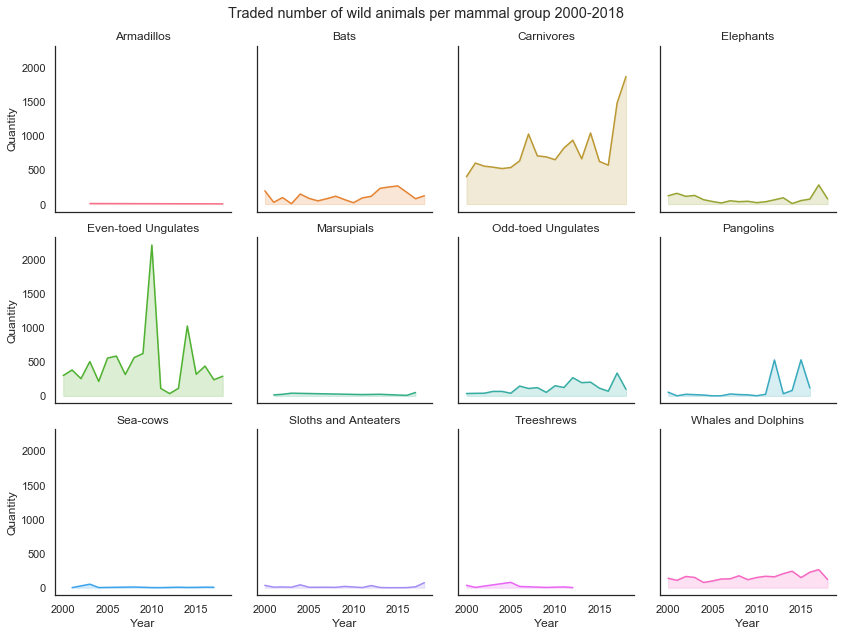

In [39]:
# visualizing the Order data over time without the primates with a facetgrid in seaborn

g = sns.FacetGrid(order_year_trades_noPrimates, col='Animal order', hue='Animal order', col_wrap=4, )

g = g.map(plt.plot, 'Year', 'Quantity')

g = g.map(plt.fill_between, 'Year', 'Quantity', alpha=0.2).set_titles("{col_name} Animal order")

g = g.set_titles("{col_name}")

plt.subplots_adjust(top=0.92)
g = g.fig.suptitle('Traded number of wild animals per mammal group 2000-2018')
 
plt.show()


After the Primates, the most traded mammal groups are the Carnivores and the Even-toed Ungulates. It looks like the trade in Carnivores in going up in recent years. What is happening there in terms of species and purpose? Let's zoom in. 

### 4.4. Carnivores

First, I'll plot the trade over time for the carnivores in general.

In [40]:
# create dataframe with numbers just for carnivores and years
df_carnivores = df2[df2['Animal order'] == 'Carnivores']
year_carnivores = df_carnivores.groupby('Year', as_index = False).agg({'Quantity': 'sum'})
year_carnivores.head()

,Year,Quantity
0,2000,400.0
1,2001,599.0
2,2002,554.0
3,2003,539.0
4,2004,519.0


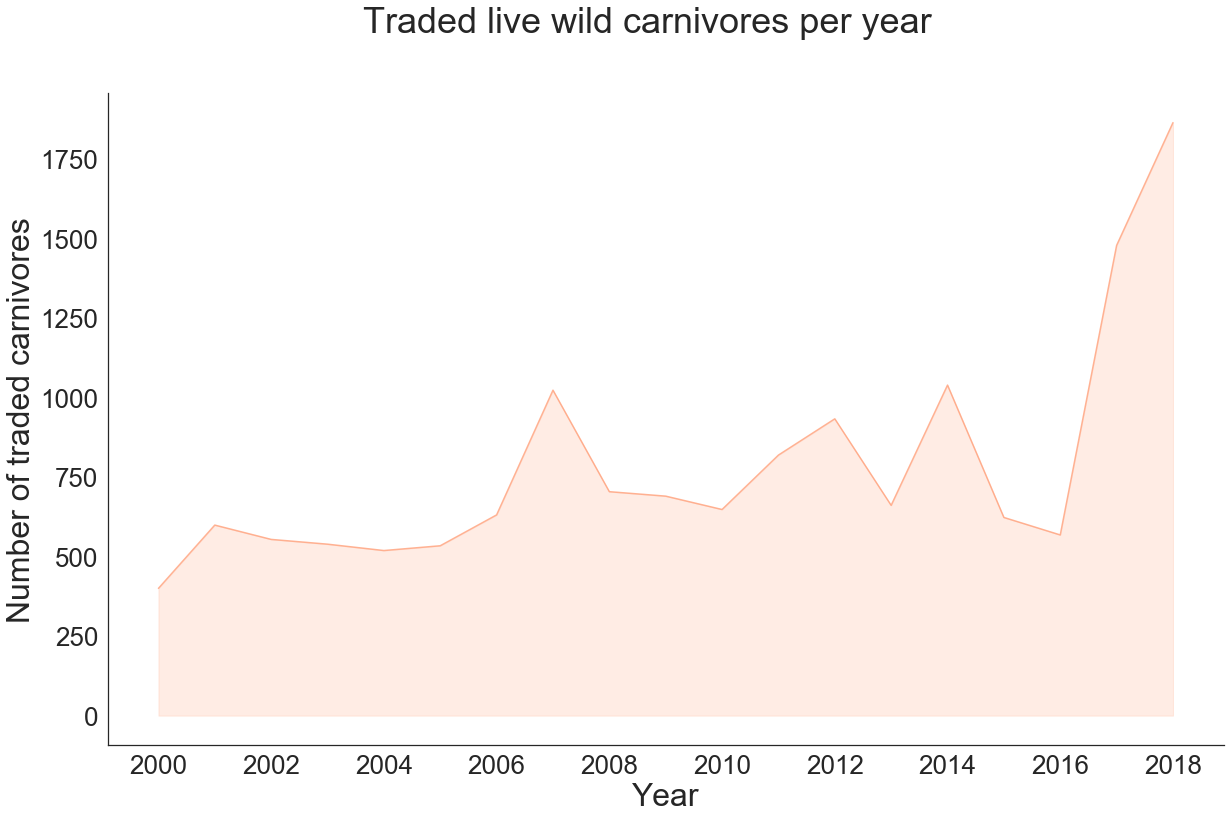

In [41]:
# Create area line chart for carnivores over time
f, ax = plt.subplots(figsize=(20, 12))
sns.set_color_codes('pastel')

plt.fill_between(year_carnivores['Year'], year_carnivores['Quantity'], color="lightsalmon", alpha=0.2)
plt.plot(year_carnivores['Year'], year_carnivores['Quantity'], color="lightsalmon", alpha=0.8)

ax.set_xticks(range(2000, 2020, 2))

ax.tick_params(axis='both', which='major', labelsize=26) 
ax.tick_params(axis='both', which='minor', labelsize=26)

plt.xlabel('Year', fontsize=32)
plt.ylabel('Number of traded carnivores', fontsize=32)
plt.suptitle('Traded live wild carnivores per year', fontsize=36)

sns.despine()

plt.show()


Next, I'll look into the different families of carnivores and how they compare in trade numbers. 

In [42]:
# make a dataframe and line chart with the different kinds

# First, inspect how many traded carnivore families there are
carnivore_family_counts = df_carnivores.groupby(['Family'], as_index = False).agg({'Quantity': 'sum'}).sort_values(by = 'Quantity', ascending = False).reset_index(drop = True)

# Add column with percentages of total
carnivore_family_counts['Percentage'] = (carnivore_family_counts['Quantity'] / carnivore_family_counts['Quantity'].sum()) *100
carnivore_family_counts

# There are several Families that are traded a lot. How do their trade patterns look over time?


,Family,Quantity,Percentage
0,Canidae,5251.0,35.417510
1,Otariidae,2896.0,19.533252
2,Felidae,2294.0,15.472818
3,Procyonidae,2193.0,14.791582
4,Viverridae,694.0,4.680966
5,Mustelidae,620.0,4.181843
6,Ursidae,441.0,2.974504
7,Odobenidae,218.0,1.470390
8,Eupleridae,185.0,1.247808
9,Hyaenidae,27.0,0.182113


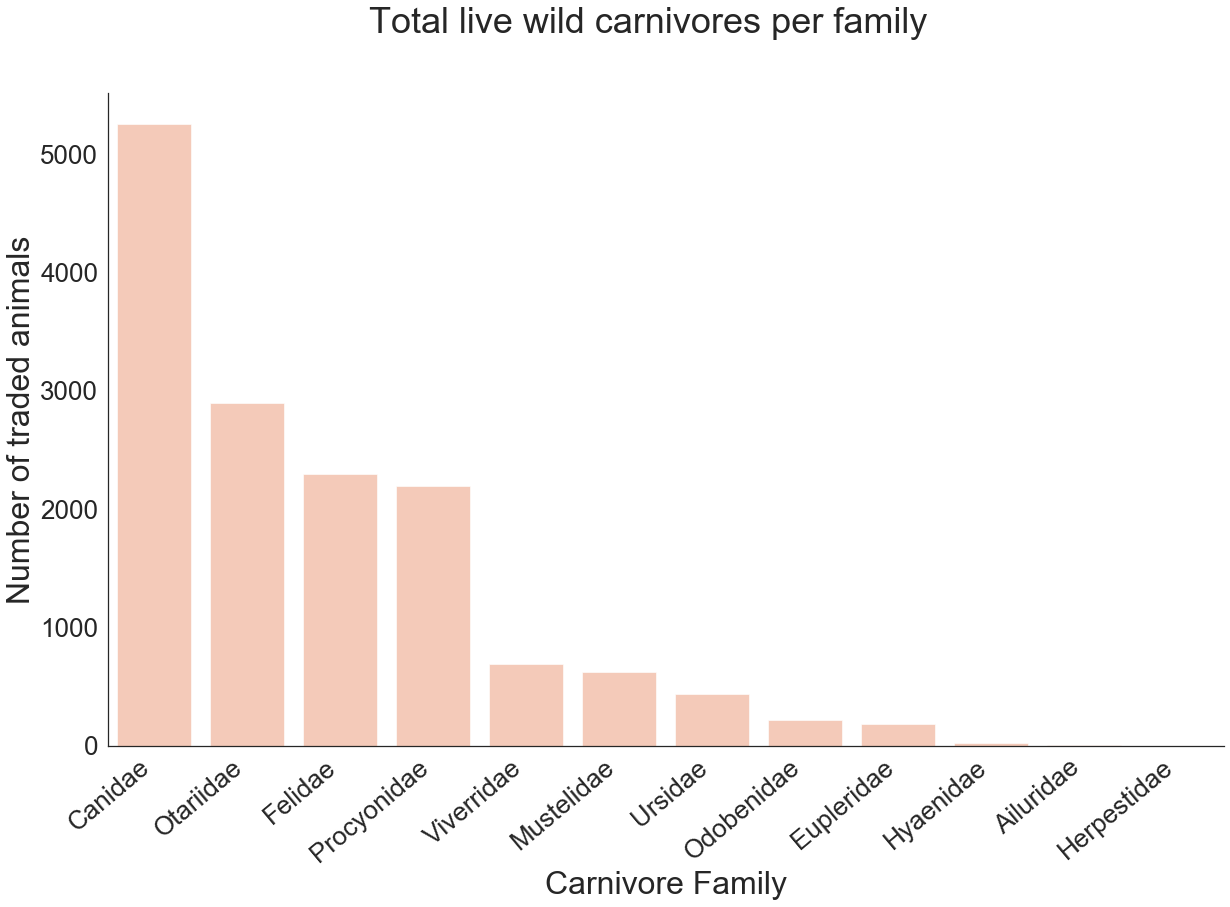

In [43]:
# visualise the overall numbers of traded carnivores per family in a bar chart

sns.set()
sns.set_style('white')

f, ax = plt.subplots(figsize=(20, 12))

sns.set_color_codes('pastel')
sns.barplot(x='Family', y= 'Quantity', data= carnivore_family_counts,
            label= 'Family', color="lightsalmon", alpha=0.6)

ax.set_xticklabels(carnivore_family_counts['Family'], rotation=40, ha='right')

ax.tick_params(axis='both', which='major', labelsize=26) 
ax.tick_params(axis='both', which='minor', labelsize=26)

plt.xlabel('Carnivore Family', fontsize=32)
plt.ylabel('Number of traded animals', fontsize=32)
plt.suptitle('Total live wild carnivores per family', fontsize=36)

sns.despine()

This figure shows that the Canids (wild dogs, wolves etc) are traded most, but the Otariidae (seals), the Felidae (cats) and the Procyonidae (Raccoons, Coatis etc) are also traded a lot. 

Next, I visualise the trade of the different carnivore families over time, again with a facetgrid for easy visual comparison

In [44]:
# Create df for different families of Carnivores over time

year_carnivores_family = df_carnivores.groupby(['Year', 'Family'], as_index = False).agg({'Quantity': 'sum'})
year_carnivores_family.head()

,Year,Family,Quantity
0,2000,Canidae,20.0
1,2000,Eupleridae,30.0
2,2000,Felidae,203.0
3,2000,Mustelidae,23.0
4,2000,Odobenidae,4.0


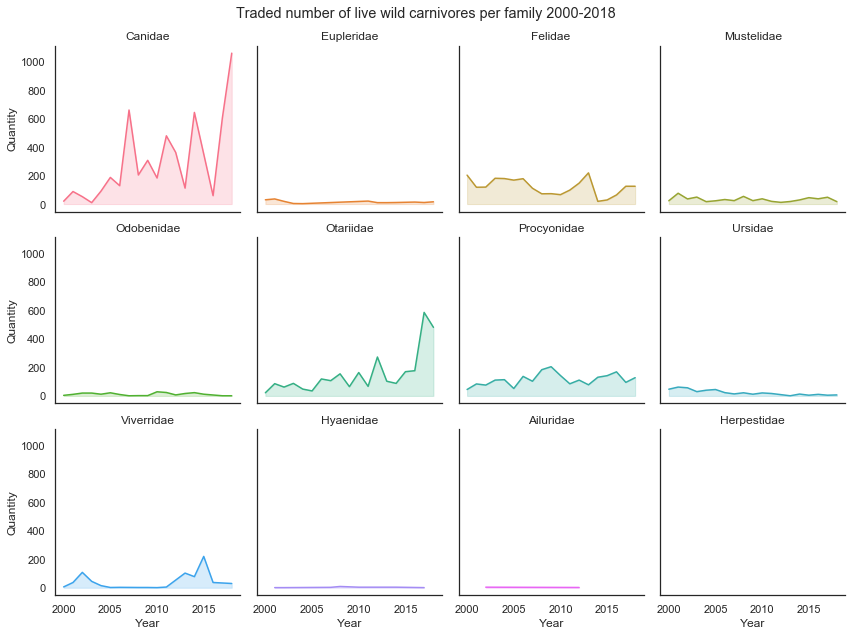

In [45]:
# #plot total number of shipped carnivores per year per family in a seaborn facetgrid

g = sns.FacetGrid(year_carnivores_family, col='Family', hue='Family', col_wrap=4, )

g = g.map(plt.plot, 'Year', 'Quantity')

g = g.map(plt.fill_between, 'Year', 'Quantity', alpha=0.2).set_titles("{col_name} Family")

g = g.set_titles("{col_name}")

plt.subplots_adjust(top=0.92)
g = g.fig.suptitle('Traded number of live wild carnivores per family 2000-2018')
 
plt.show()

This shows that for the Canids and for the Seals the numbers are going up in recent years. Which species of these groups are traded most? 

In [46]:
# create df for the Canidae

canidae = df2[df2['Family'] == 'Canidae']

canidae_taxon_counts = canidae.groupby(['Taxon'], as_index = False).agg({'Quantity': 'sum'}).sort_values(by = 'Quantity', ascending = False).reset_index(drop = True)

# Add column with percentages of total
canidae_taxon_counts['Percentage'] = (canidae_taxon_counts['Quantity'] / canidae_taxon_counts['Quantity'].sum()) *100
canidae_taxon_counts.head()

,Taxon,Quantity,Percentage
0,Vulpes zerda,4594.0,87.488098
1,Lycalopex gymnocercus,506.0,9.636260
2,Canis lupus,131.0,2.494763
3,Cerdocyon thous,12.0,0.228528
4,Lycalopex griseus,7.0,0.133308


In [47]:
# Same for the Otariidae

otariidae = df2[df2['Family'] == 'Otariidae']

otariidae_taxon_counts = otariidae.groupby(['Taxon'], as_index = False).agg({'Quantity': 'sum'}).sort_values(by = 'Quantity', ascending = False).reset_index(drop = True)

# Add column with percentages of total
otariidae_taxon_counts['Percentage'] = (otariidae_taxon_counts['Quantity'] / otariidae_taxon_counts['Quantity'].sum()) *100
otariidae_taxon_counts.head()


,Taxon,Quantity,Percentage
0,Arctocephalus australis,1722.0,59.461326
1,Arctocephalus pusillus,1161.0,40.089779
2,Arctocephalus spp.,5.0,0.172652
3,Arctocephalus forsteri,4.0,0.138122
4,Arctocephalus tropicalis,4.0,0.138122


In [48]:
# Also let's look at Felidae

felidae = df2[df2['Family'] == 'Felidae']

felidae_taxon_counts = felidae.groupby(['Taxon'], as_index = False).agg({'Quantity': 'sum'}).sort_values(by = 'Quantity', ascending = False).reset_index(drop = True)

# Add column with percentages of total
felidae_taxon_counts['Percentage'] = (felidae_taxon_counts['Quantity'] / felidae_taxon_counts['Quantity'].sum()) *100
felidae_taxon_counts.head()

,Taxon,Quantity,Percentage
0,Leptailurus serval,553.0,24.106364
1,Lynx canadensis,391.0,17.044464
2,Panthera leo,356.0,15.518745
3,Felis margarita,177.0,7.715780
4,Caracal caracal,158.0,6.887533


Canidae: The fennec fox is by far the most traded canid (87%), followed by the pampas fox and the wolf. Fennec foxes are popular as pets and are also used for their fur in North Africa.

For the Otariidea, the top two species account for more than 99% of the trade, these are both species of fur seal. 

For the cats, servals are the most traded with 24%, followed by Canada Lynx (17%) and Lion (16%)

Next, I'll look at how the trading purpose of the carnivores looks over time.

In [49]:
# create dataframe with total number of shipped animals per year per purpose

carnivores_year_purpose = df_carnivores.groupby(['Year', 'Purpose'], as_index = False).agg({'Quantity': 'sum'})
carnivores_year_purpose.head()

,Year,Purpose,Quantity
0,2000,Captive breeding,16.0
1,2000,Circus,38.0
2,2000,Commercial,172.0
3,2000,Hunting trophy,1.0
4,2000,Personal,22.0


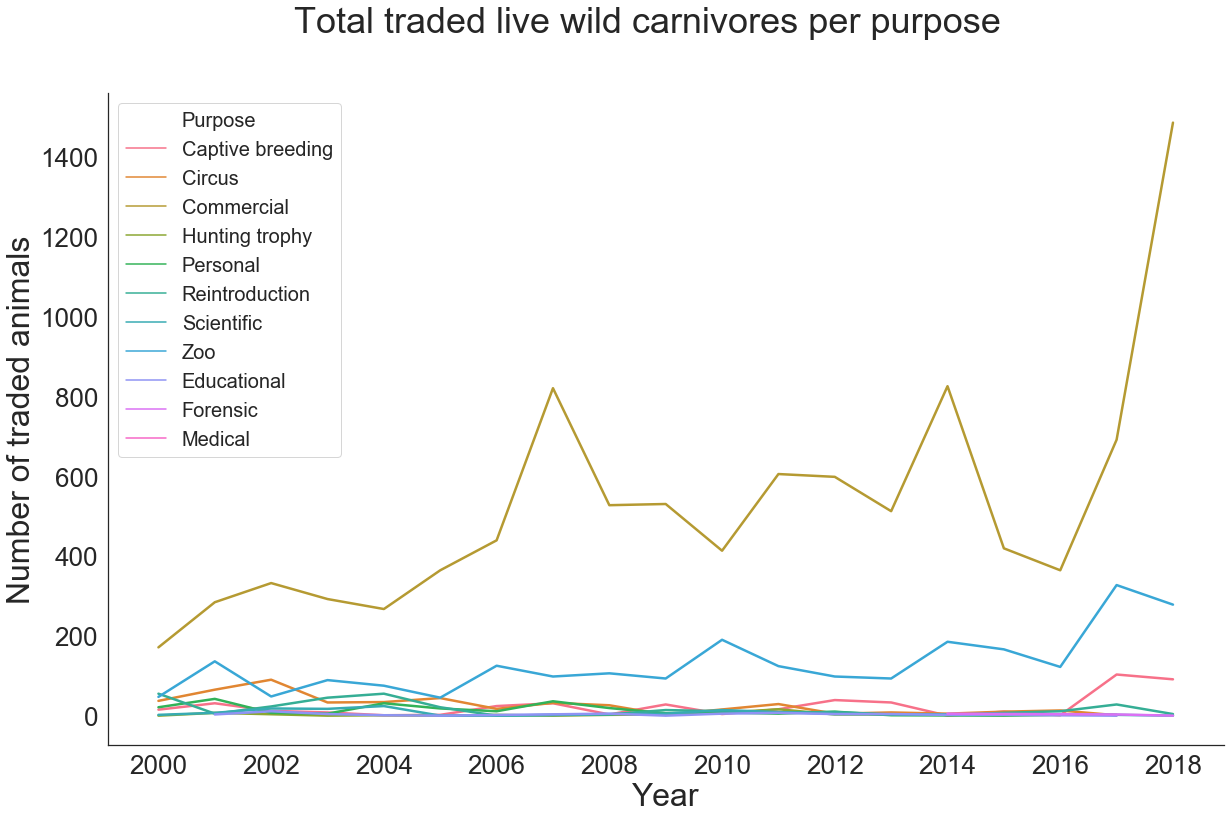

In [50]:
#plot total number of shipped carnivores per year per purpose

f, ax = plt.subplots(figsize=(20, 12))

sns.lineplot(x = 'Year', y = 'Quantity', hue = 'Purpose', data = carnivores_year_purpose, linewidth=2.5)

ax.tick_params(axis='both', which='major', labelsize=26) 
ax.tick_params(axis='both', which='minor', labelsize=26)
ax.set_xticks(range(2000, 2020, 2))

ax.legend(loc="upper left", frameon=True, fontsize = 20)

plt.xlabel('Year', fontsize=32)
plt.ylabel('Number of traded animals', fontsize=32)
plt.suptitle('Total traded live wild carnivores per purpose', fontsize=36)

sns.despine()


The increase in trade in the Canidea in recents year is clearly due to a spike in commercial trade. 

### 5. Conclusions and next steps

The main conclusions of this project, in answer to the research questions, are:
* Primates are the most traded group, followed by the carnivores
* The most common trade purpose is commercial, including for animal testing, pet trade, and fur
* Overall trade is down from last decade but some groups are going up in recent years

As a next step I'd like to visualize trade between countries with maps, and identify the biggest importers and exporters